In [43]:
import string
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import Counter

# doc2vec tool
import gensim
from gensim.models import doc2vec

# classification 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [58]:
# loading data
reviews_df = pd.read_csv('./data/reviews_clean.csv',
                        converters={'Review_lemmatized': pd.eval}) # just this used
                        #converters={'Review_lemmatized': pd.eval, 'Review_stopwords': pd.eval, 'Review_bigrams': pd.eval})

In [ ]:
reviews_df

,Review,Rating,Review_processed,Review_lemmatized,Review_stopwords,Review_bigrams
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","['nice', 'hotel', 'expensive', 'parking', 'got...","[('nice', 'hotel'), ('hotel', 'expensive'), ('..."
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","['ok', 'nothing', 'special', 'charge', 'diamon...","[('ok', 'nothing'), ('nothing', 'special'), ('..."
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not experience hotel monaco seattl...,"[nice, room, not, experience, hotel, monaco, s...","['nice', 'room', 'experience', 'hotel', 'monac...","[('nice', 'room'), ('room', 'experience'), ('e..."
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ...","['unique', 'great', 'stay', 'wonderful', 'time...","[('unique', 'great'), ('great', 'stay'), ('sta..."
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...","['great', 'stay', 'great', 'stay', 'went', 'se...","[('great', 'stay'), ('stay', 'great'), ('great..."
...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,best kept secret rd time staying charm not sta...,"[best, kept, secret, rd, time, staying, charm,...","['best', 'kept', 'secret', 'rd', 'time', 'stay...","[('best', 'kept'), ('kept', 'secret'), ('secre..."
20487,great location price view hotel great quick pl...,4,great location price view hotel great quick pl...,"[great, location, price, view, hotel, great, q...","['great', 'location', 'price', 'view', 'hotel'...","[('great', 'location'), ('location', 'price'),..."
20488,"ok just looks nice modern outside, desk staff ...",2,ok just looks nice modern outside desk staff n...,"[ok, just, look, nice, modern, outside, desk, ...","['ok', 'look', 'nice', 'modern', 'outside', 'd...","[('ok', 'look'), ('look', 'nice'), ('nice', 'm..."
20489,hotel theft ruined vacation hotel opened sept ...,1,hotel theft ruined vacation hotel opened sept ...,"[hotel, theft, ruined, vacation, hotel, opened...","['hotel', 'theft', 'ruined', 'vacation', 'hote...","[('hotel', 'theft'), ('theft', 'ruined'), ('ru..."


In [ ]:
reviews_df['words_number'] = reviews_df.Review_lemmatized.apply(lambda x: len(x))

In [ ]:
# TODO: optimize
all_words = []

for rev in reviews_df.Review_lemmatized:
    all_words.extend(rev)
    
len(all_words)

2092254

In [ ]:
word_occurence_number = pd.DataFrame.from_dict(Counter(all_words), orient='index')

In [ ]:
word_occurence_number

,0
nice,12409
hotel,52901
expensive,1924
parking,1624
got,6186
...,...
victimizedthis,1
tallers,1
cornerone,1
pocketthere,1


<AxesSubplot: >

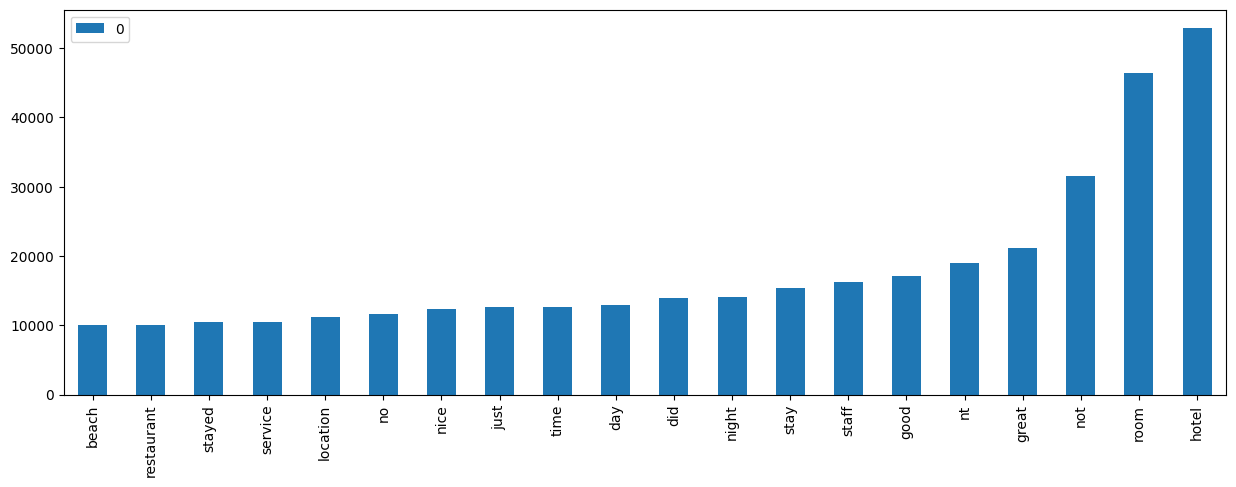

In [ ]:
word_occurence_number.sort_values(by=0).iloc[-20:].plot(kind='bar', figsize=(15, 5))

In [ ]:
word_occurence_number.describe()

,0
count,71900.000000
mean,29.099499
std,414.316660
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,52901.000000


In [ ]:
np.mean(reviews_df.words_number)

102.105997755112

In [ ]:
# increased to obtain better performce
n_epochs = 32
# the 75% value
# maybe it is even to high, gonna just after performence
# but this will include around 25 % of the occuring words
min_count = 5
# around 5% of the mean length of reviews
window_size = 5
# first try
vector_size = 32

In [ ]:
tagged_words = [doc2vec.TaggedDocument(words=review, tags=[str(i)]) for i, review in enumerate(reviews_df.Review_lemmatized)]

In [ ]:
doc2vec_model = doc2vec.Doc2Vec(vector_size=vector_size, min_count=min_count, epochs=n_epochs, window=window_size)
doc2vec_model.build_vocab(tagged_words)
doc2vec_model.train(tagged_words, total_examples=doc2vec_model.corpus_count, epochs=n_epochs)
doc2vec_model.save("doc2vec-30.model")

In [55]:
doc2vec_model.dv.most_similar(['1'])

[('324', 0.7149484157562256),
 ('6439', 0.7097141146659851),
 ('6141', 0.6921769976615906),
 ('19243', 0.6751701831817627),
 ('1920', 0.6749929189682007),
 ('14619', 0.6705833673477173),
 ('12786', 0.66885906457901),
 ('10682', 0.6626612544059753),
 ('406', 0.659744918346405),
 ('669', 0.6548999547958374)]

In [56]:
revies_for_classification.iloc[324].Review

"high marks booked starwood using cash starwood points option, stayed nights, town wedding business, early check-in not problem.i given king room 23rd floor north tower floor starwood preferred guest members, room immaculate stains carpet ca n't change flooring visitor, big room sofa chair coffee table desk, bathroom spacious well-stocked, awoke morning staring space needle vista-view harbor huge bank windows, natural light day eliminated need use lights, bed fabulous.all hotel staff cheerful helpful, complaint concierge staff better understanding bus system.room service menu bit slim late night food n't bad came in-house restaurants, nice bar huge lobby.location good, short walk pike place two-minute walk monorail, light rail lake union street bus lines run hotel, easy cab help valet guys, major complaint hotel charge internet access use business center, obviously trend thought spg member using points given free business center access, print boarding pass free positive,  "

In [ ]:
reviews_df['doc2vec'] = reviews_df.Review_lemmatized.apply(lambda text_list: list(doc2vec_model.infer_vector(text_list)))

In [ ]:
reviews_for_classification = reviews_df[['Review', 'Review_lemmatized', 'words_number', 'doc2vec', 'Rating']]

[TaggedDocument(words=['nice', 'hotel', 'expensive', 'parking', 'got', 'good', 'deal', 'stay', 'hotel', 'anniversary', 'arrived', 'late', 'evening', 'took', 'advice', 'previous', 'review', 'did', 'valet', 'parking', 'check', 'quick', 'easy', 'little', 'disappointed', 'nonexistent', 'view', 'room', 'room', 'clean', 'nice', 'size', 'bed', 'comfortable', 'woke', 'stiff', 'neck', 'high', 'pillow', 'not', 'soundproof', 'like', 'heard', 'music', 'room', 'night', 'morning', 'loud', 'bang', 'door', 'opening', 'closing', 'hear', 'people', 'talking', 'hallway', 'maybe', 'just', 'noisy', 'neighbor', 'aveda', 'bath', 'product', 'nice', 'did', 'not', 'goldfish', 'stay', 'nice', 'touch', 'taken', 'advantage', 'staying', 'longer', 'location', 'great', 'walking', 'distance', 'shopping', 'overall', 'nice', 'experience', 'having', 'pay', 'parking', 'night'], tags=['0']),
 TaggedDocument(words=['ok', 'nothing', 'special', 'charge', 'diamond', 'member', 'hilton', 'decided', 'chain', 'shot', 'th', 'anniver

### Saving as csv

In [33]:
revies_for_classification.to_csv('./data/reviews_for_classifiaction.csv', index=False)

### Loading data

In [79]:
revies_for_classification = pd.read_csv("reviews_for_classifiaction.csv", 
                                        converters={'Review_lemmatized': pd.eval, 'doc2vec': pd.eval})

# Classifiaction

In [34]:
svc_simplest_input = SVC()

## Classification just on the embedded document
Viviani said on the lecture that while doing classification we should also consider the number of commas, average word length ans ect.

### Preparing training and test set

In [35]:
# checking if everything is alrigth 
# to delete later
revies_for_classification.doc2vec

0        [0.77675647, -0.27449954, 0.06556557, -0.62016...
1        [2.4167154, -0.7965517, -0.5648652, -1.8460034...
2        [0.81423783, -0.21097274, 0.79801434, -0.74825...
3        [-0.8796887, -0.24414712, 0.32636607, -1.20059...
4        [0.22824062, 0.8119447, 0.32690483, -0.7204859...
                               ...                        
20486    [0.45811054, -1.0578471, 0.048305467, 0.095600...
20487    [-0.5682172, -0.29032513, -0.7681521, -0.44127...
20488    [0.08156369, -0.7570584, -1.9712918, -1.295611...
20489    [1.7271627, -1.0783868, 0.230616, 2.3660853, -...
20490    [0.42585918, 0.3936068, -0.86008763, 0.0662222...
Name: doc2vec, Length: 20491, dtype: object

In [36]:
X_train, X_test, y_train, y_test = train_test_split(revies_for_classification.doc2vec.to_list(), revies_for_classification.Rating, test_size=0.1)

In [37]:
len(X_train), len(y_train), len(X_test), len(y_test)

(18441, 18441, 2050, 2050)

In [38]:
svc_simplest_input.fit(X_train, y_train)

SVC()

In [39]:
y_pred = svc_simplest_input.predict(X_test)

In [40]:
accuracy_score(y_test, y_pred)

0.573170731707317

In [41]:
y_train_pred = svc_simplest_input.predict(X_train)

In [42]:
accuracy_score(y_train, y_train_pred)

0.6919364459628002

## Classification with metadata